In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Método de Euler y Runge-Kutta de orden 4 como una clase

## Definimos una clase para cualquier tipo de sistema lineal de $2\times 2$

In [2]:
class SistemaLineal:
    def __init__(self,a,b,c,d):
        """
        y1 = a*x0+b*x1
        y2 = c*x0+d*x1
        """
        self.a = a
        self.b = b
        self.c = c
        self.d = d
    def __call__(self,X):
        x1 = self.a*X[0]+self.b*X[1]
        x2 = self.c*X[0]+self.d*X[1]
        
        return np.r_[x1,x2]
        

## Método de Euler para un resolver sistema de $k$-ecuaciones

El método de Euler tiene que ver con resolver la ecuación diferencial de primer orden
\\[\dot{x} = f(t,x)\\]
con un valor inicial \\(x(t=a) = x_0 \\) dentro de un intervalo $ a \leq t \leq  b $

Aproximando como una ecuación de diferencias:
\begin{eqnarray}
 \frac{dx}{dt} &  = & f(t,x) \\
 \frac{\Delta x}{\Delta t} & = & f(t,x) \\ 
  \Delta x & = & f(t,x)\Delta t \\
   x_{i+1}-x_{i}  & = & f(t_{i},x_{i})\Delta t \\
   x_{i+1}  & = & x_{i}+f(t_{i},x_{i})\Delta t \\
\end{eqnarray}
esto es para una ecuación de primer orden con valor inicial.

\\[x_{i+1}  =  x_{i}+f(t_{i},x_{i})\Delta t \\]


Para un sistema de ecuaciones tenemos: 
\begin{eqnarray}
 \frac{dx^{1}}{dt} &  = & f_{1}(t,x^{1},\dots,x^{n}) \\
 \frac{dx^{2}}{dt} &  = & f_{2}(t,x^{1},\dots,x^{n}) \\
 \vdots & & \vdots \\ 
  \frac{dx^{k}}{dt} &  = & f_{k}(t,x^{1},\dots,x^{n}) \\
\end{eqnarray}
cuya condición inicial es $(x^{1}_{0},\dots,x^{k}_{0})$  y donde las $x^{j}$ no son potencias sino índices. 

Por lo tanto tenemos $k$ ecuaciones en diferencias
\begin{eqnarray}
 x^{1}_{i+1}  & = & x^{1}_{i}+f_{1}(t_{i},x^{1}_{i},\dots,x^{k}_{i})\Delta t \\
 x^{2}_{i+1}  & = & x^{2}_{i}+f_{2}(t_{i},x^{1}_{i},\dots,x^{k}_{i})\Delta t \\
  \vdots & & \vdots \\ 
 x^{k}_{i+1}  & = & x^{k}_{i}+f_{k}(t_{i},x^{1}_{i},\dots,x^{k}_{i})\Delta t \\
\end{eqnarray}

La información que se quiere para resolver el problema será:

Las condiciones iniciales: $(x^{1}_{0},\dots,x^{k}_{0})$ 

El tiempo total:   $T = t_{n}-t_{1} $

El número de pasos: $n$

El tamaño de paso:   $t_{i+1} = t_{i} +\frac{T}{n} = t_{i} +h$ 

## Método de Runge-Kutta de orden 4 para un problema de valor inicial de primer orden

Método de Runge-Kutta de orden 4 para resolver la ecuación diferencial de primer orden
\\[\dot{x} = f(t,x)\\]
con un valor inicial \\(x(t=a) = x_0 \\) dentro de un intervalo $ a \leq t \leq  b $


\begin{eqnarray}
k_1 & = & hf(t_i,x_i) \\
k_2 & = & hf\left( t_i+\frac{h}{2},x_i+\frac{1}{2}k_1 \right) \\
k_3 & = & hf\left( t_i+\frac{h}{2},x_i+\frac{1}{2}k_2 \right) \\
k_4 & = & hf( t_i+h,x_i+k_3 ) \\
x_{i+1} & = & x_i + \frac{1}{6}(k_1+2k_2+2k_3+k_4) \\
\end{eqnarray}




## Definimos una clase para resolver numéricamente un sistema de EDO's

In [3]:
class SolSystem:
    """
    Clase para resolver numéricamente un sistema de EDOs por el método de Euler o de Runge-Kutta de orden 4
    SolSystem(time,steps,function)
    time: intervalo de tiempo en el que se da solución, tomado desde cero
    N: número de puntos en los cuales se resuelve el sistema 
    funcion: sistema de EDOs en forma de función vectorial
    """
    def __init__(self,time,N,funcion):
        """
        h: tamaño de paso del sistema
        """
        self.time = time
        self.N = N 
        self.h = time/N 
        self.h2 = self.h/2.
        self.h6 = self.h/6.
        self.funcion = funcion

    def euler_step(self,x0):
        """
        Un paso del método de Euler
        x0: condición inicial
        """
        return x0+self.funcion(x0)*self.h
    
    def rk4_step(self,x0):
        """
        Un paso del método de Runge-Kutta de orden 4
        x0: condición inicial
        """
        k1 = self.funcion(x0)
        k2 = self.funcion(x0 + self.h2*k1)
        k3 = self.funcion(x0 + self.h2*k2)
        k4 = self.funcion(x0 + self.h*k3)
        return x0 + self.h6*(k1 + 2.*k2 + 2.*k3 +k4)
  
    
    def trajectory(self,x0,method='euler'):
        """
        
        trajectory(condición inicial, método de solución)
        x0: condicion inicial
        method: 'euler' o 'rk4'
        """
        if method == 'euler':
            step = self.euler_step
        if method == 'rk4':
            step = self.rk4_step
        x0 = np.array(x0)
        traject = np.empty((self.N,x0.size))
        self.time_s = np.empty(self.N)
        traject[0] = x0
        self.time_s[0] = 0 
        for i in range(self.N-1):
            traject[i+1] = step(traject[i])
            self.time_s[i+1] = (i+1)*self.h  
        return traject

    def time_steps(self):
        """
        Regresa el arreglo de puntos temporales
        """
        return self.time_s

In [4]:
# tiempo de total de solución y número de pasos
t_total, numero_paso = 10, 100
# Define un sistema lineal particular en forma de objeto
sistema1 = SistemaLineal(1,1,4,-2)
# Solución del sistema lineal por medio de la clase SolSystem
solucion = SolSystem(t_total,numero_paso,sistema1)

In [5]:
X = solucion.trajectory([1,1])
T = solucion.time_steps()

# Sistema presa-predador

$
\;
\dot{N_1} = \alpha N_1 - \beta N_1 N_2 \\
\;\\
\dot{N_2} = -\gamma N_2 + \delta N_1 N_2 
$    

In [6]:
class PresaPredador:
    def __init__(self,alpha,beta,gamma,delta):
        """
        N1 = alpha*n1-beta*n1*n2
        N2 = -gamma*n2+delta*n1*n2
        """
        self.a = alpha
        self.b = beta
        self.c = gamma
        self.d = delta
    def __call__(self,X):
        x1 = self.a*X[0]-self.b*X[0]*X[1]
        x2 = -self.c*X[1]+self.d*X[0]*X[1]
        
        return np.r_[x1,x2]
        

In [7]:
sistemaPP1 = PresaPredador(1,.5,3,.7) # Inicializar el sistema presa predador

In [8]:
t = 10
N = 1000
x0 = [8,4]
solsistPP1 = SolSystem(t,N,sistemaPP1)

In [9]:
X = solsistPP1.trajectory(x0) # solución numérica por método de euler
X1 = solsistPP1.trajectory(x0,method='rk4') # solución numérica por el método rk4
T = solsistPP1.time_steps()

Text(0, 0.5, '$N_2$')

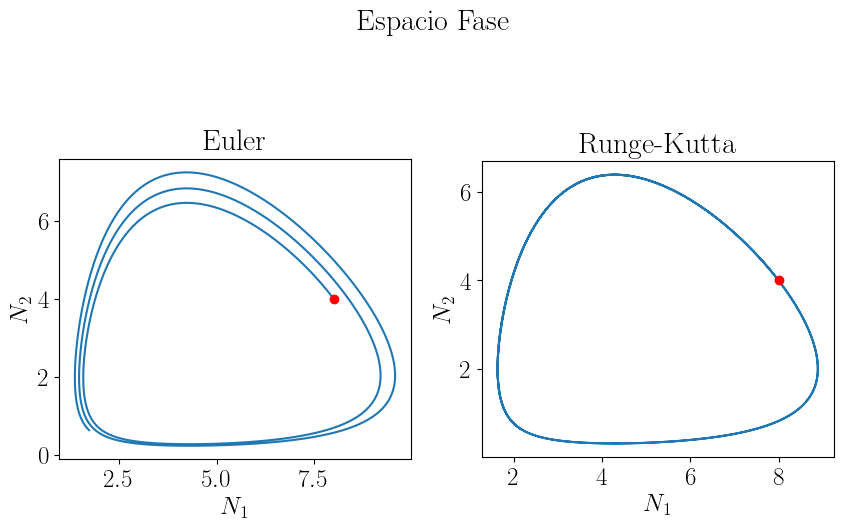

In [10]:
graficas = plt.figure()
graficas.suptitle('Espacio Fase')
subgrafica1 = graficas.add_subplot(121)
subgrafica1.set_aspect('equal','box')
subgrafica1.set_title('Euler')
subgrafica2 = graficas.add_subplot(122)
subgrafica2.set_aspect('equal','box')
subgrafica2.set_title('Runge-Kutta')
subgrafica1.plot(X[:,0],X[:,1])
subgrafica2.plot(X1[:,0],X1[:,1])
subgrafica1.plot(x0[0],x0[1],'ro')
subgrafica2.plot(x0[0],x0[1],'ro')

subgrafica1.set_xlabel("$N_1$")
subgrafica1.set_ylabel("$N_2$")
subgrafica2.set_xlabel("$N_1$")
subgrafica2.set_ylabel("$N_2$")


# Competencia entre especies 

$\;$  
$
\;
\dot{N_1} = r_1N_1 \left[1 - \dfrac{N_1 + \alpha N_2}{K_1} \right] \\ 
\;\\
\dot{N_2} = r_2N_2 \left[1 - \dfrac{N_2 + \beta N_1}{K_2} \right]
$    

In [11]:
class CompetenciaEspecies:
    def __init__(self,r1,r2,k1,k2,alpha,beta):
        """
        N1 = r1*n1*[1-(n1+alpha*n2)/k1]
        N2 = r2*n2*[1-(n2+beta*n1)/k2]
        """
        self.r1 = r1
        self.r2 = r2
        self.k1 = k1
        self.k2 = k2
        self.alpha = alpha
        self.beta = beta
    def __call__(self,X):
        x1 = self.r1*X[0]*(1-(X[0]+self.alpha*X[1])/self.k1)
        x2 = self.r2*X[1]*(1-(X[1]+self.beta*X[0])/self.k2)
        return np.r_[x1,x2]
        

In [12]:
r1 = 1
r2 = .5
alpha = .7
beta = 3
K1 = 100
K2 = 200

In [13]:
sistemaCE1 = CompetenciaEspecies(r1,r2,K1,K2,alpha,beta)
ttiempo = 20
numero_pasos = 1000
solsistCE1 = SolSystem(ttiempo,numero_pasos,sistemaCE1)

In [14]:
x0 = [6,7] # condición inicial
X = solsistCE1.trajectory(x0) # solución numérica por método de euler
X1 = solsistCE1.trajectory(x0,method='rk4') # solución numérica por el método rk4
T = solsistCE1.time_steps()

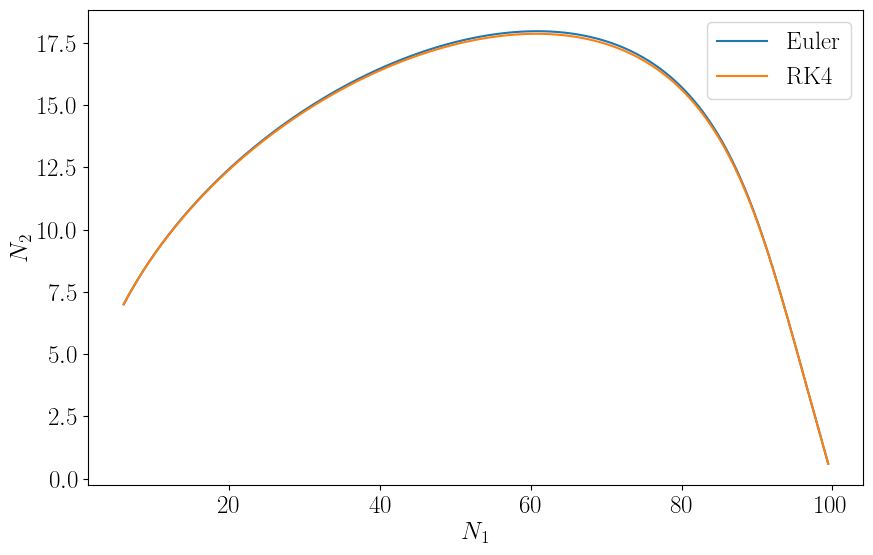

In [15]:
plt.plot(X[:,0],X[:,1],label='Euler')
plt.plot(X1[:,0],X1[:,1],label='RK4')
plt.xlabel('$N_1$')
plt.ylabel('$N_2$')
plt.legend()